## Data Cleaning

In [1]:
import warnings
import os
import pandas as pd
import numpy as np
import re
import copy
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
os.chdir(os.getcwd())
pd.options.display.max_rows = 10

In [2]:
print(os.getcwd())

C:\Users\ankit19.gupta\ankit\ankit\gate_marks_distribution


In [3]:
xslx=pd.ExcelFile('.\\Mark Distribution in GATE CSE.xlsx')
df=pd.read_excel(xslx,sheet_name='Alt. View')

In [4]:
df.dropna(how='all',axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df=pd.DataFrame(df.values[:-3],columns=df.columns)
df.fillna(0,inplace=True)

In [5]:
df[list(df.columns)[1]] = df[list(df.columns)[1]].astype(str)
df[list(df.columns)[1]][14] = '1,12'
df[list(df.columns)[1]][20] = '7,8,10'
df[list(df.columns)[1]][23] = '7,15'
df[list(df.columns)[1]][26] = '6,7'
df[list(df.columns)[2]] = df[list(df.columns)[2]].astype(str)
df[list(df.columns)[2]][11] = '1,6'
df[list(df.columns)[2]][17] = '1,8'
df[list(df.columns)[3]] = df[list(df.columns)[3]].astype(str)
df[list(df.columns)[3]][26] = '22,4'
df[list(df.columns)[4]] = df[list(df.columns)[4]].astype(str)
df[list(df.columns)[4]][2] = '11,12'
df[list(df.columns)[5]] = df[list(df.columns)[5]].astype(str)
df[list(df.columns)[5]][23] = '11,14'
df[list(df.columns)[5]][26] = '11,12'
df[list(df.columns)[6]] = df[list(df.columns)[6]].astype(str)
df[list(df.columns)[6]][23] = '3,19'
df[list(df.columns)[8]] = df[list(df.columns)[8]].astype(str)
df[list(df.columns)[8]][23] = '1,2'
df[list(df.columns)[8]][26] = '5,23'
df[list(df.columns)[9]] = df[list(df.columns)[9]].astype(str)
df[list(df.columns)[9]][26] = '2,21'
df[list(df.columns)[10]] = df[list(df.columns)[10]].astype(str)
df[list(df.columns)[10]][20] = '5,6,16'
df[list(df.columns)[10]][26] = '3,20'

In [6]:
arr=np.array(df['Year'])
for i in range(len(arr)):
    if arr[i]=='2 Marks':
        x=arr[i-1][:]
        arr[i]=x+':'+arr[i]
    elif arr[i]=='1 Mark':
        x=arr[i-2][:]
        arr[i]=x+':'+arr[i] 
df['Year']=pd.Series(arr)

In [7]:
arr=np.array(df['Year'])
pattern=' - '
reg=re.compile(pattern,flags=re.IGNORECASE)
for i in range(len(arr)):
    arr[i]=reg.sub('-',arr[i])
df['Year']=pd.Series(arr)

In [8]:
df1=df[::3]
df2=df[1::3]
df3=df[2::3]

In [9]:
set_one_total_marks=df1[np.array(df1['Year'].str.match(r'[0-9][0-9][0-9][0-9]-1',flags=re.IGNORECASE))]
set_two_total_marks=df1[np.array(df1['Year'].str.match(r'[0-9][0-9][0-9][0-9]-2',flags=re.IGNORECASE))]
set_three_total_marks=df1[np.array(df1['Year'].str.match(r'[0-9][0-9][0-9][0-9]-3',flags=re.IGNORECASE))]
temp=df1[~df1.index.isin(set_one_total_marks.index)]
temp=temp[~temp.index.isin(set_three_total_marks.index)]
one_set_total_marks=temp[~temp.index.isin(set_two_total_marks.index)]
set_one_total_marks['Year']=set_one_total_marks['Year'].str.replace('[-][1]','')
set_two_total_marks['Year']=set_two_total_marks['Year'].str.replace('[-][2]','')
set_three_total_marks['Year']=set_three_total_marks['Year'].str.replace('[-][3]','')

In [10]:
set_one_two_marks=df2[np.array(df2['Year'].str.match(r'[0-9][0-9][0-9][0-9]-1',flags=re.IGNORECASE))]
set_two_two_marks=df2[np.array(df2['Year'].str.match(r'[0-9][0-9][0-9][0-9]-2',flags=re.IGNORECASE))]
set_three_two_marks=df2[np.array(df2['Year'].str.match(r'[0-9][0-9][0-9][0-9]-3',flags=re.IGNORECASE))]
temp=df2[~df2.index.isin(set_one_two_marks.index)]
temp=temp[~temp.index.isin(set_three_two_marks.index)]
one_set_two_marks=temp[~temp.index.isin(set_two_two_marks.index)]
set_one_two_marks['Year']=set_one_two_marks['Year'].str.replace('[-][1]:2 Marks','')
set_two_two_marks['Year']=set_two_two_marks['Year'].str.replace('[-][2]:2 Marks','')
set_three_two_marks['Year']=set_three_two_marks['Year'].str.replace('[-][3]:2 Marks','')
one_set_two_marks['Year']=one_set_two_marks['Year'].str.replace(':2 Marks','')

In [11]:
set_one_one_mark=df3[np.array(df3['Year'].str.match(r'[0-9][0-9][0-9][0-9]-1',flags=re.IGNORECASE))]
set_two_one_mark=df3[np.array(df3['Year'].str.match(r'[0-9][0-9][0-9][0-9]-2',flags=re.IGNORECASE))]
set_three_one_mark=df3[np.array(df3['Year'].str.match(r'[0-9][0-9][0-9][0-9]-3',flags=re.IGNORECASE))]
temp=df3[~df3.index.isin(set_one_one_mark.index)]
temp=temp[~temp.index.isin(set_three_one_mark.index)]
one_set_one_mark=temp[~temp.index.isin(set_two_one_mark.index)]
set_one_one_mark['Year']=set_one_one_mark['Year'].str.replace('[-][1]:1 Mark','')
set_two_one_mark['Year']=set_two_one_mark['Year'].str.replace('[-][2]:1 Mark','')
set_three_one_mark['Year']=set_three_one_mark['Year'].str.replace('[-][3]:1 Mark','')
one_set_one_mark['Year']=one_set_one_mark['Year'].str.replace(':1 Mark','')

In [12]:
set_one_total_marks.to_csv("datasets\\set_one_total_marks.csv",index=False,header=True,encoding='utf-8')
set_two_total_marks.to_csv("datasets\\set_two_total_marks.csv",index=False,header=True,encoding='utf-8')
set_three_total_marks.to_csv("datasets\\set_three_total_marks.csv",index=False,header=True,encoding='utf-8')
one_set_total_marks.to_csv("datasets\\one_set_total_marks.csv",index=False,header=True,encoding='utf-8')

In [13]:
def find_count(x):
    if isinstance(x,str): 
        return len(x.split(','))
    else:
        if x==0:
            return 0
        else:
            return 1

In [14]:
set_one_two_marks_count=set_one_two_marks.copy()
for i in range(1,len(set_one_two_marks_count.columns)-1):
    set_one_two_marks_count[set_one_two_marks_count.columns[i]]=set_one_two_marks_count[set_one_two_marks_count.columns[i]].map(find_count)
set_one_two_marks_count.drop('Total',axis=1,inplace=True)
set_two_two_marks_count=set_two_two_marks.copy()
for i in range(1,len(set_two_two_marks_count.columns)-1):
    set_two_two_marks_count[set_two_two_marks_count.columns[i]]=set_two_two_marks_count[set_two_two_marks_count.columns[i]].map(find_count)
set_two_two_marks_count.drop('Total',axis=1,inplace=True)    
set_three_two_marks_count=set_three_two_marks.copy()
for i in range(1,len(set_three_two_marks_count.columns)-1):
    set_three_two_marks_count[set_three_two_marks_count.columns[i]]=set_three_two_marks_count[set_three_two_marks_count.columns[i]].map(find_count)
set_three_two_marks_count.drop('Total',axis=1,inplace=True)    
one_set_two_marks_count=one_set_two_marks.copy()
for i in range(1,len(one_set_two_marks_count.columns)-1):
    one_set_two_marks_count[one_set_two_marks_count.columns[i]]=one_set_two_marks_count[one_set_two_marks_count.columns[i]].map(find_count)
one_set_two_marks_count.drop('Total',axis=1,inplace=True)    

In [15]:
set_one_one_mark_count=set_one_one_mark.copy()
for i in range(1,len(set_one_one_mark_count.columns)-1):
    set_one_one_mark_count[set_one_one_mark_count.columns[i]]=set_one_one_mark_count[set_one_one_mark_count.columns[i]].map(find_count)
set_one_one_mark_count.drop('Total',axis=1,inplace=True)
set_two_one_mark_count=set_two_one_mark.copy()
for i in range(1,len(set_two_one_mark_count.columns)-1):
    set_two_one_mark_count[set_two_one_mark_count.columns[i]]=set_two_one_mark_count[set_two_one_mark_count.columns[i]].map(find_count)
set_two_one_mark_count.drop('Total',axis=1,inplace=True)    
set_three_one_mark_count=set_three_one_mark.copy()
for i in range(1,len(set_three_one_mark_count.columns)-1):
    set_three_one_mark_count[set_three_one_mark_count.columns[i]]=set_three_one_mark_count[set_three_one_mark_count.columns[i]].map(find_count)
set_three_one_mark_count.drop('Total',axis=1,inplace=True)    
one_set_one_mark_count=one_set_one_mark.copy()
for i in range(1,len(one_set_one_mark_count.columns)-1):
    one_set_one_mark_count[one_set_one_mark_count.columns[i]]=one_set_one_mark_count[one_set_one_mark_count.columns[i]].map(find_count)
one_set_one_mark_count.drop('Total',axis=1,inplace=True)    

In [16]:
set_one_total_two_marks=pd.DataFrame(np.hstack((set_one_two_marks_count.values[:,0].reshape(len(set_one_two_marks_count.values),1),set_one_two_marks_count.values[:,1:]*2)),columns=set_one_two_marks_count.columns,index=set_one_two_marks_count.index)
set_one_total_two_marks.to_csv("datasets\\set_one_total_two_marks.csv",index=False)
set_one_two_marks_count.to_csv("datasets\\set_one_two_marks_count.csv",index=False,header=True,encoding='utf-8')

set_two_total_two_marks=pd.DataFrame(np.hstack((set_two_two_marks_count.values[:,0].reshape(len(set_two_two_marks_count.values),1),set_two_two_marks_count.values[:,1:]*2)),columns=set_two_two_marks_count.columns,index=set_two_two_marks_count.index)
set_two_total_two_marks.to_csv("datasets\\set_two_total_two_marks.csv",index=False)
set_two_two_marks_count.to_csv("datasets\\set_two_two_marks_count.csv",index=False,header=True,encoding='utf-8')

set_three_total_two_marks=pd.DataFrame(np.hstack((set_three_two_marks_count.values[:,0].reshape(len(set_three_two_marks_count.values),1),set_three_two_marks_count.values[:,1:]*2)),columns=set_three_two_marks_count.columns,index=set_three_two_marks_count.index)
set_three_total_two_marks.to_csv("datasets\\set_three_total_two_marks.csv",index=False)
set_three_two_marks_count.to_csv("datasets\\set_three_two_marks_count.csv",index=False,header=True,encoding='utf-8')
    
one_set_total_two_marks=pd.DataFrame(np.hstack((one_set_two_marks_count.values[:,0].reshape(len(one_set_two_marks_count.values),1),one_set_two_marks_count.values[:,1:]*2)),columns=one_set_two_marks_count.columns,index=one_set_two_marks_count.index)
one_set_total_two_marks.to_csv("datasets\\one_set_total_two_marks.csv",index=False)
one_set_two_marks_count.to_csv("datasets\\one_set_two_marks_count.csv",index=False,header=True,encoding='utf-8')


In [17]:
set_one_total_one_mark=set_one_one_mark_count*1
set_one_total_one_mark.to_csv("datasets\\set_one_total_one_mark.csv",index=False)
set_one_one_mark_count.to_csv("datasets\\set_one_one_mark_count.csv",index=False,header=True,encoding='utf-8')

set_two_total_one_mark=set_two_one_mark_count*1
set_two_total_one_mark.to_csv("datasets\\set_two_total_one_mark.csv",index=False)
set_two_one_mark_count.to_csv("datasets\\set_two_one_mark_count.csv",index=False,header=True,encoding='utf-8')

set_three_total_one_mark=set_three_one_mark_count*1
set_three_total_one_mark.to_csv("datasets\\set_three_total_one_mark.csv",index=False)
set_three_one_mark_count.to_csv("datasets\\set_three_one_mark_count.csv",index=False,header=True,encoding='utf-8')
    
one_set_total_one_mark=one_set_one_mark_count*1
one_set_total_one_mark.to_csv("datasets\\one_set_total_one_mark.csv",index=False)
one_set_one_mark_count.to_csv("datasets\\one_set_one_mark_count.csv",index=False,header=True,encoding='utf-8')

In [18]:
# total marks
df1=set_one_total_marks
df2=set_two_total_marks
df3=set_three_total_marks
df4=one_set_total_marks
all_years_total_marks=pd.concat([df1,df2,df3,df4], ignore_index=True)
all_years_total_marks = all_years_total_marks.astype(int)
all_years_total_marks=all_years_total_marks.groupby(['Year'], sort=True)[['Theory of Computation','Algorithms','Digital Logic','Operating System',
 'Databases',
 'Compiler Design',
 'IS & Software Engg.',
 'CO & Architecture',
 'Programming',
 'Data Structures',
 'Computer Networks',
 'Web Technologies',
 'Discrete Mathematics',
 'Mathematical Logic',
 'Set Theory & Algebra',
 'Combinatory',
 'Graph Theory',
 'Engineering Mathematics',
 'Probability',
 'Linear Algebra',
 'Numerical Methods',
 'Calculus',
 'Quantitative Aptitude',
 'Verbal Aptitude',
 'Analytical Aptitude',
 'Spatial Aptitude',
 'Total']].mean()
all_years_total_marks = all_years_total_marks.reset_index()

In [19]:
all_years_total_marks

,Year,Theory of Computation,Algorithms,Digital Logic,Operating System,Databases,Compiler Design,IS & Software Engg.,CO & Architecture,Programming,...,Engineering Mathematics,Probability,Linear Algebra,Numerical Methods,Calculus,Quantitative Aptitude,Verbal Aptitude,Analytical Aptitude,Spatial Aptitude,Total
0,2010,7.000000,11.0,8.000000,7.0,7.000000,5.000000,4.0,6.000000,2.000000,...,0.000000,4.000000,2.000000,1.000000,1.000000,9.0,6.0,0.0,0.0,100.0
1,2011,8.000000,13.0,7.000000,8.0,7.000000,6.000000,5.0,7.000000,1.000000,...,0.000000,6.000000,2.000000,0.000000,2.000000,6.0,9.0,0.0,0.0,100.0
2,2012,5.000000,12.0,5.000000,9.0,11.000000,4.000000,0.0,5.000000,7.000000,...,0.000000,5.000000,1.000000,2.000000,1.000000,6.0,9.0,0.0,0.0,100.0
3,2013,8.000000,13.0,5.000000,12.0,7.000000,3.000000,3.0,9.000000,2.000000,...,4.000000,2.000000,1.000000,1.000000,1.000000,9.0,6.0,0.0,0.0,100.0
4,2014,5.666667,9.0,5.666667,8.0,5.333333,4.666667,1.0,5.666667,1.333333,...,8.666667,3.666667,2.333333,1.333333,2.666667,8.0,7.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2020,9.000000,8.0,6.000000,10.0,8.000000,4.000000,0.0,9.000000,3.000000,...,5.000000,2.000000,2.000000,0.000000,1.000000,7.0,6.0,2.0,0.0,100.0
11,2021,9.500000,9.5,6.500000,7.0,7.500000,6.500000,0.0,5.500000,5.000000,...,8.500000,5.000000,2.500000,0.000000,1.000000,6.5,4.0,2.0,2.5,100.0
12,2022,8.000000,6.0,5.000000,10.0,7.000000,4.000000,0.0,7.000000,5.000000,...,6.000000,0.000000,5.000000,0.000000,1.000000,6.0,3.0,3.0,3.0,100.0
13,2023,9.000000,6.0,6.000000,9.0,5.000000,7.000000,0.0,10.000000,1.000000,...,6.000000,2.000000,2.000000,0.000000,2.000000,5.0,4.0,3.0,3.0,100.0


In [20]:
# total 2 marks
df1=set_one_total_two_marks
df2=set_two_total_two_marks
df3=set_three_total_two_marks
df4=one_set_total_two_marks
all_years_total_two_marks=pd.concat([df1,df2,df3,df4], ignore_index=True)
all_years_total_two_marks = all_years_total_two_marks.astype(int)
all_years_total_two_marks=all_years_total_two_marks.groupby(['Year'], sort=True)[['Theory of Computation','Algorithms','Digital Logic','Operating System',
 'Databases',
 'Compiler Design',
 'IS & Software Engg.',
 'CO & Architecture',
 'Programming',
 'Data Structures',
 'Computer Networks',
 'Web Technologies',
 'Discrete Mathematics',
 'Mathematical Logic',
 'Set Theory & Algebra',
 'Combinatory',
 'Graph Theory',
 'Engineering Mathematics',
 'Probability',
 'Linear Algebra',
 'Numerical Methods',
 'Calculus',
 'Quantitative Aptitude',
 'Verbal Aptitude',
 'Analytical Aptitude',
 'Spatial Aptitude']].mean()
all_years_total_two_marks = all_years_total_two_marks.reset_index()

In [21]:
# total one mark
df1=set_one_total_one_mark
df2=set_two_total_one_mark
df3=set_three_total_one_mark
df4=one_set_total_one_mark
all_years_total_one_mark=pd.concat([df1,df2,df3,df4], ignore_index=True)
all_years_total_one_mark = all_years_total_one_mark.astype(int)
all_years_total_one_mark=all_years_total_one_mark.groupby(['Year'], sort=True)[['Theory of Computation','Algorithms','Digital Logic','Operating System',
 'Databases',
 'Compiler Design',
 'IS & Software Engg.',
 'CO & Architecture',
 'Programming',
 'Data Structures',
 'Computer Networks',
 'Web Technologies',
 'Discrete Mathematics',
 'Mathematical Logic',
 'Set Theory & Algebra',
 'Combinatory',
 'Graph Theory',
 'Engineering Mathematics',
 'Probability',
 'Linear Algebra',
 'Numerical Methods',
 'Calculus',
 'Quantitative Aptitude',
 'Verbal Aptitude',
 'Analytical Aptitude',
 'Spatial Aptitude']].mean()
all_years_total_one_mark = all_years_total_one_mark.reset_index()

In [22]:
all_years_total_marks.to_csv("datasets\\all_years_total_marks.csv",index=False,encoding='utf-8',header=True)
all_years_total_two_marks.to_csv("datasets\\all_years_total_two_marks.csv",index=False,encoding='utf-8',header=True)
all_years_total_one_mark.to_csv("datasets\\all_years_total_one_mark.csv",index=False,encoding='utf-8',header=True)

In [179]:
set1=set_one_total_marks
set2=set_two_total_marks
single_set=one_set_total_marks

In [180]:
set1=set1[(set1['Year']=='2021')| (set1['Year']=='2022')| (set1['Year']=='2023')|(set1['Year']=='2024')]

In [181]:
set2=set2[(set2['Year']=='2021')| (set2['Year']=='2022')| (set2['Year']=='2023')|(set2['Year']=='2024')]

In [182]:
single_set=single_set[(single_set['Year']=='2021')| (single_set['Year']=='2022')| (single_set['Year']=='2023')|(single_set['Year']=='2024')]

### Set-1

In [183]:
x=np.array(set1.Year)
df1=set1
df1.reset_index(drop=True, inplace=True)
df1.drop('Year',axis=1,inplace=True)
df1.drop('Total',axis=1,inplace=True)
df=pd.DataFrame(df1.T.values,columns=df1.index,index=df1.columns)
df = df.astype(int)

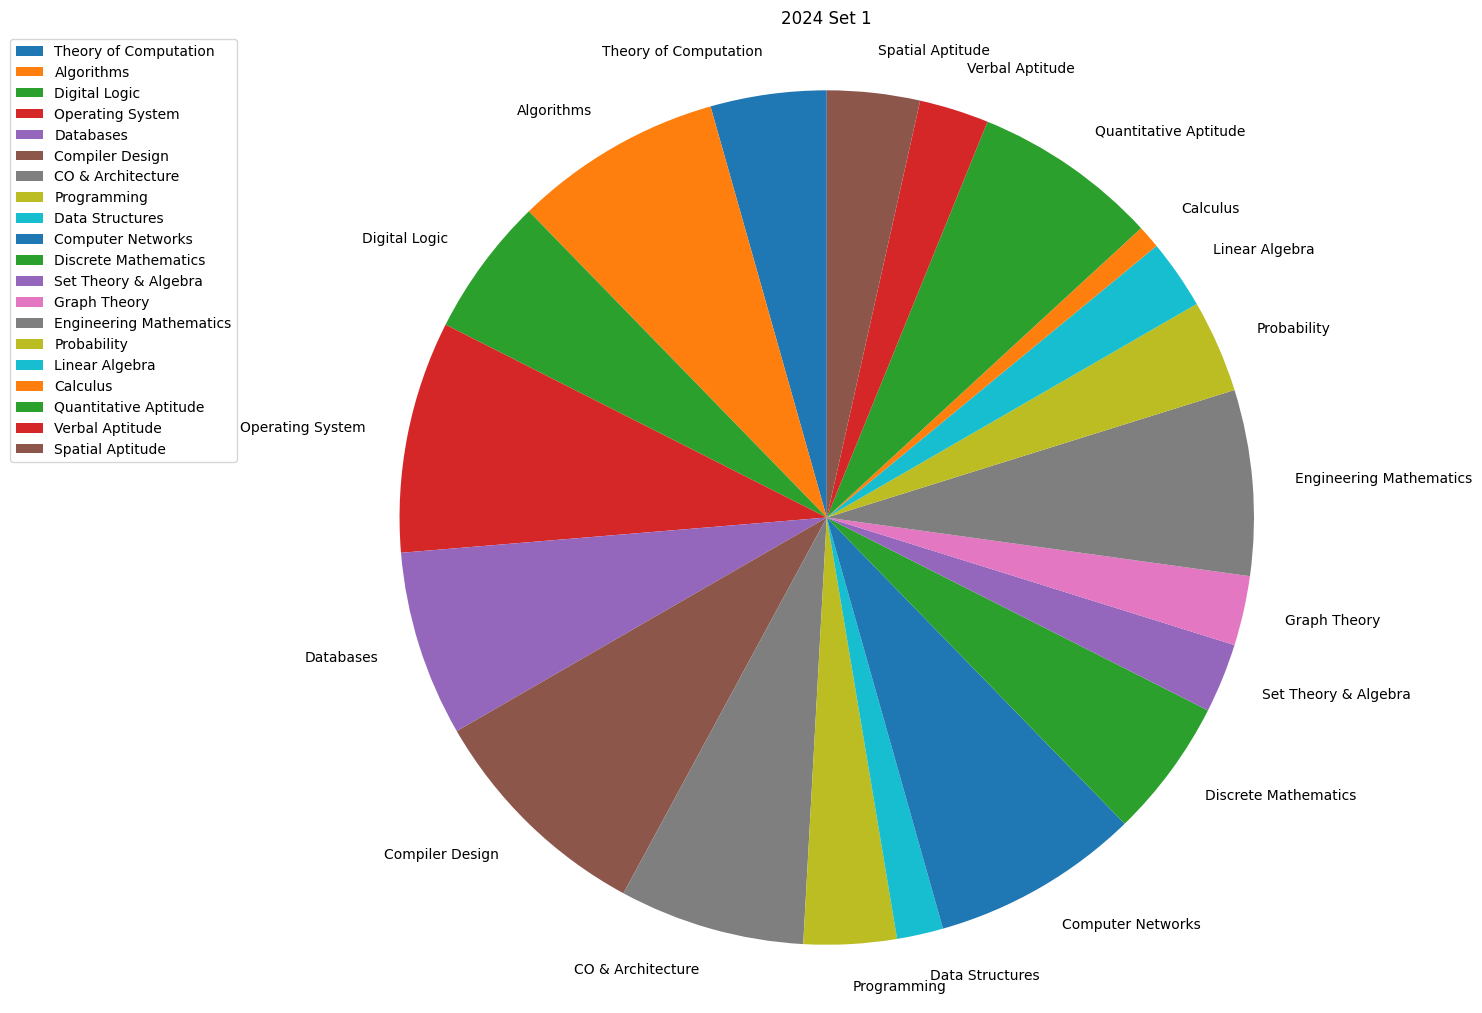

In [184]:
df.plot.pie(y=0,figsize=(15, 15),startangle=90, radius=1.1,label='')
plt.title('2024 Set 1')
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
#plt.axis('equal')
plt.tight_layout()
plt.savefig('piecharts\\piechart_2024_set1.png', bbox_inches='tight')

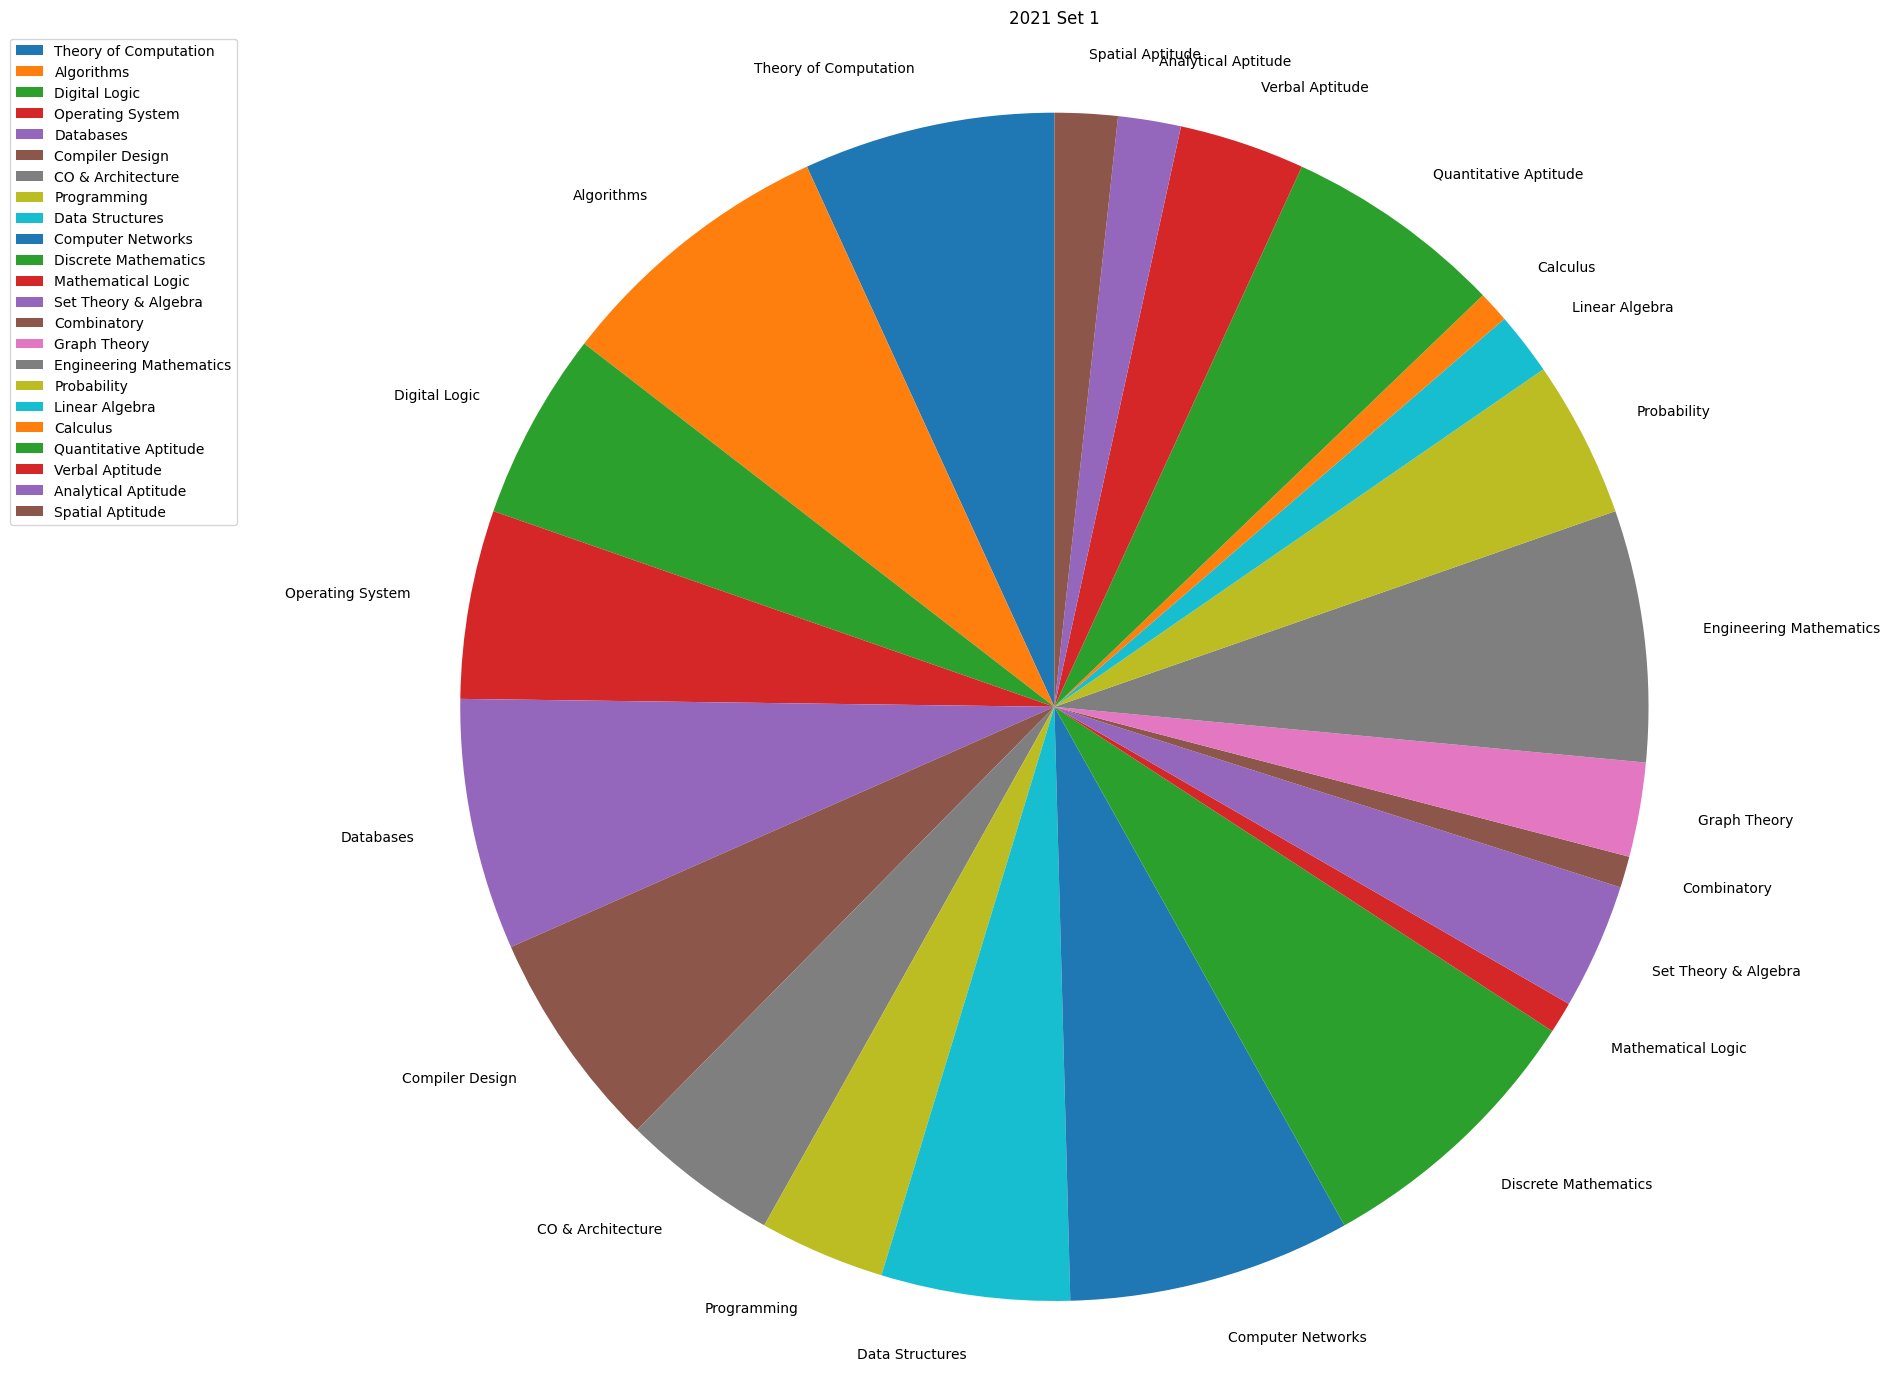

In [185]:
df.plot.pie(y=1,figsize=(19, 19),startangle=90, radius=1.1,label='')
plt.title('2021 Set 1')
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
#plt.axis('equal')
plt.tight_layout()
plt.savefig('piecharts\\piechart_2021_set1.png', bbox_inches='tight')

## Set 2

In [186]:
x=np.array(set2.Year)
df1=set2
df1.reset_index(drop=True, inplace=True)
df1.drop('Year',axis=1,inplace=True)
df1.drop('Total',axis=1,inplace=True)
df=pd.DataFrame(df1.T.values,columns=df1.index,index=df1.columns)
df = df.astype(int)

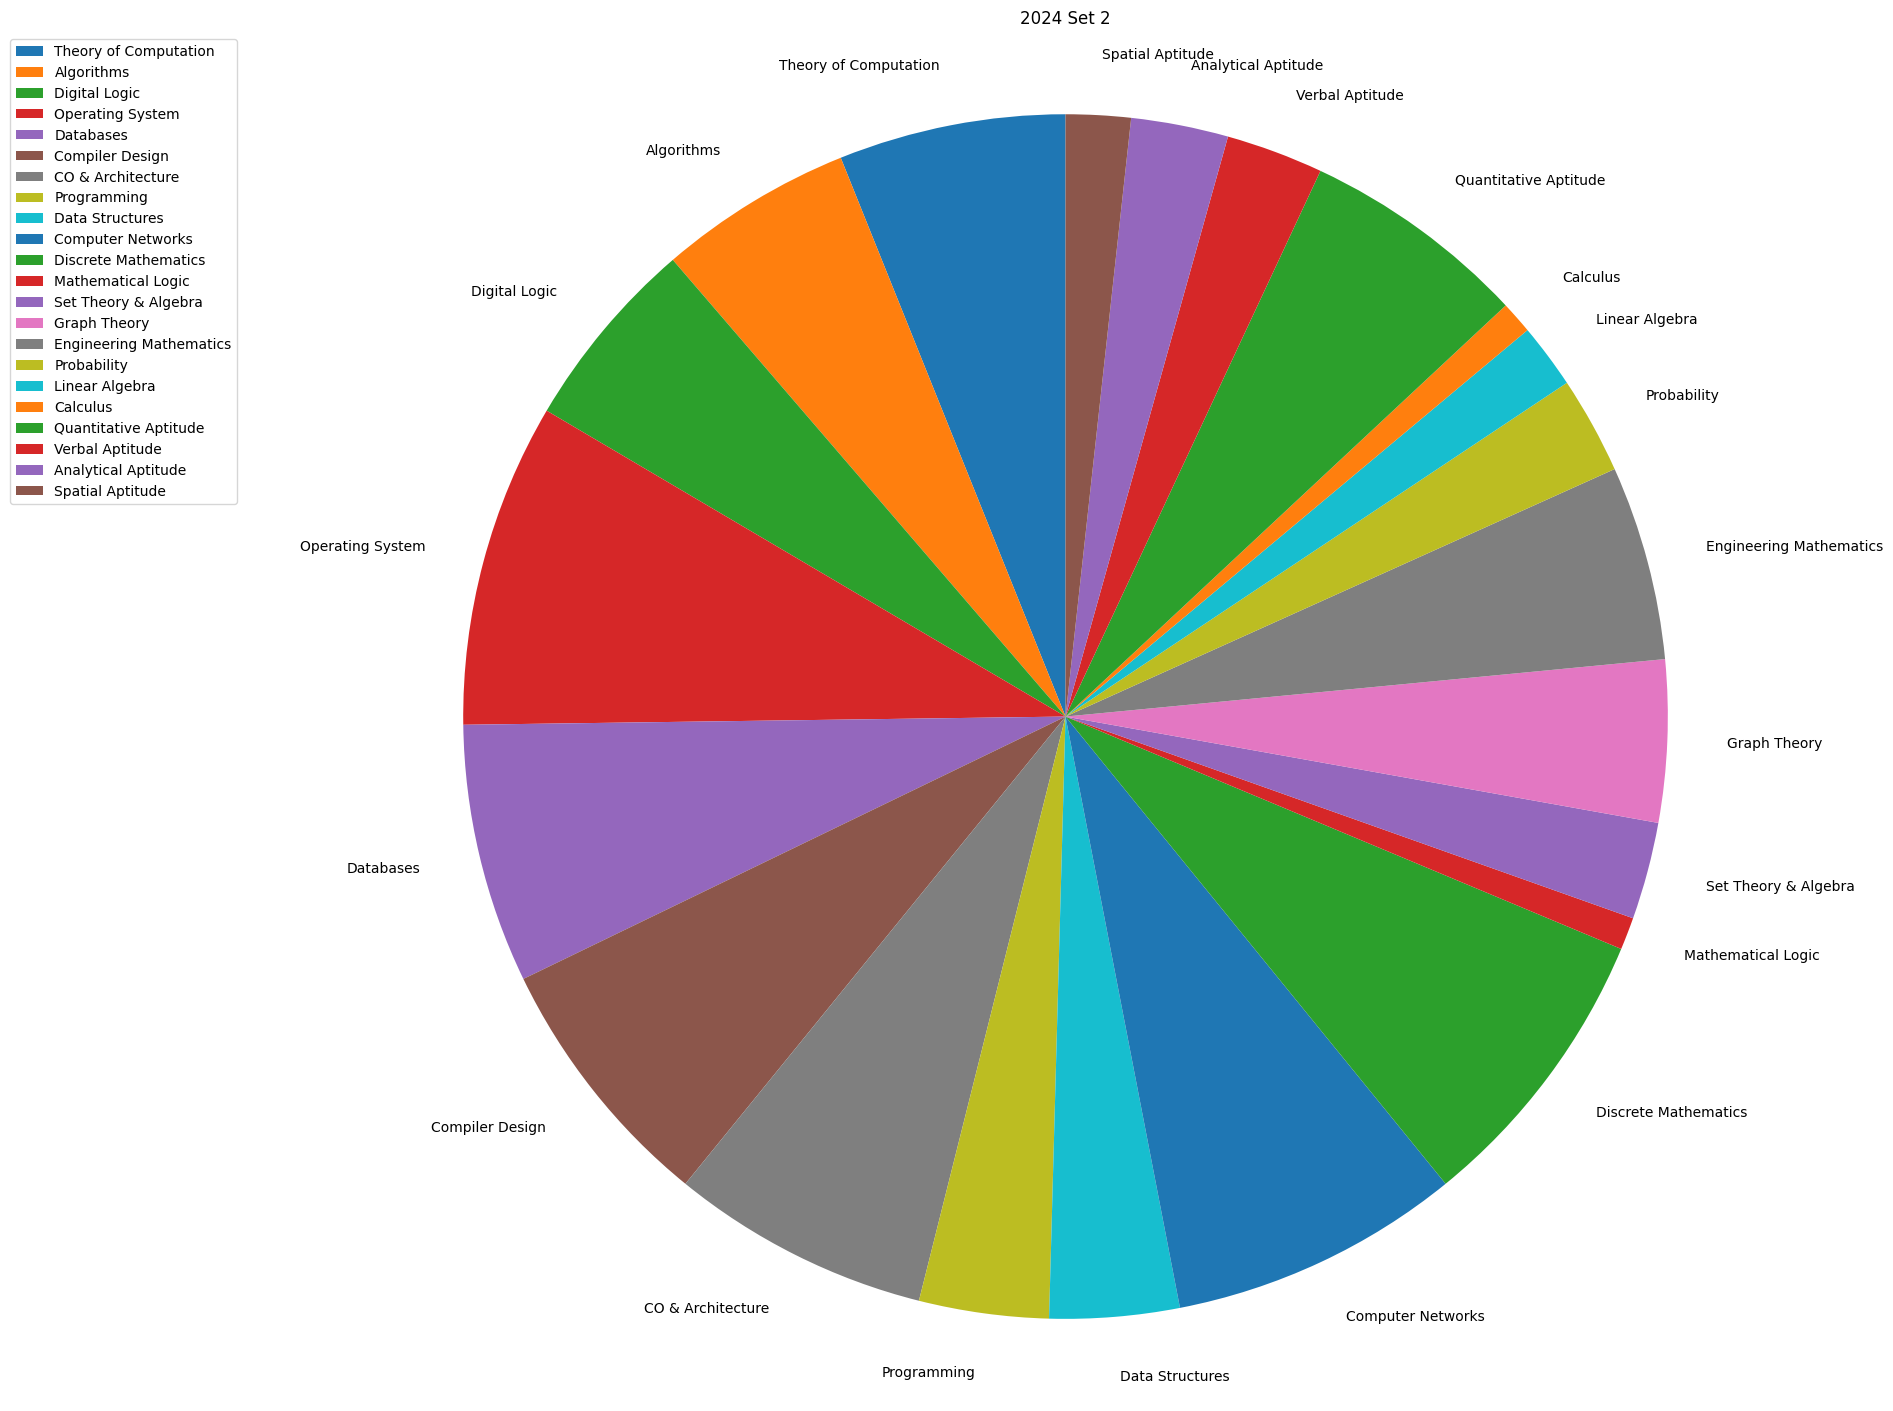

In [187]:
df.plot.pie(y=0,figsize=(19, 19),startangle=90, radius=1.1,label='')
plt.title('2024 Set 2')
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
#plt.axis('equal')
plt.tight_layout()
plt.savefig('piecharts\\piechart_2024_set2.png', bbox_inches='tight')

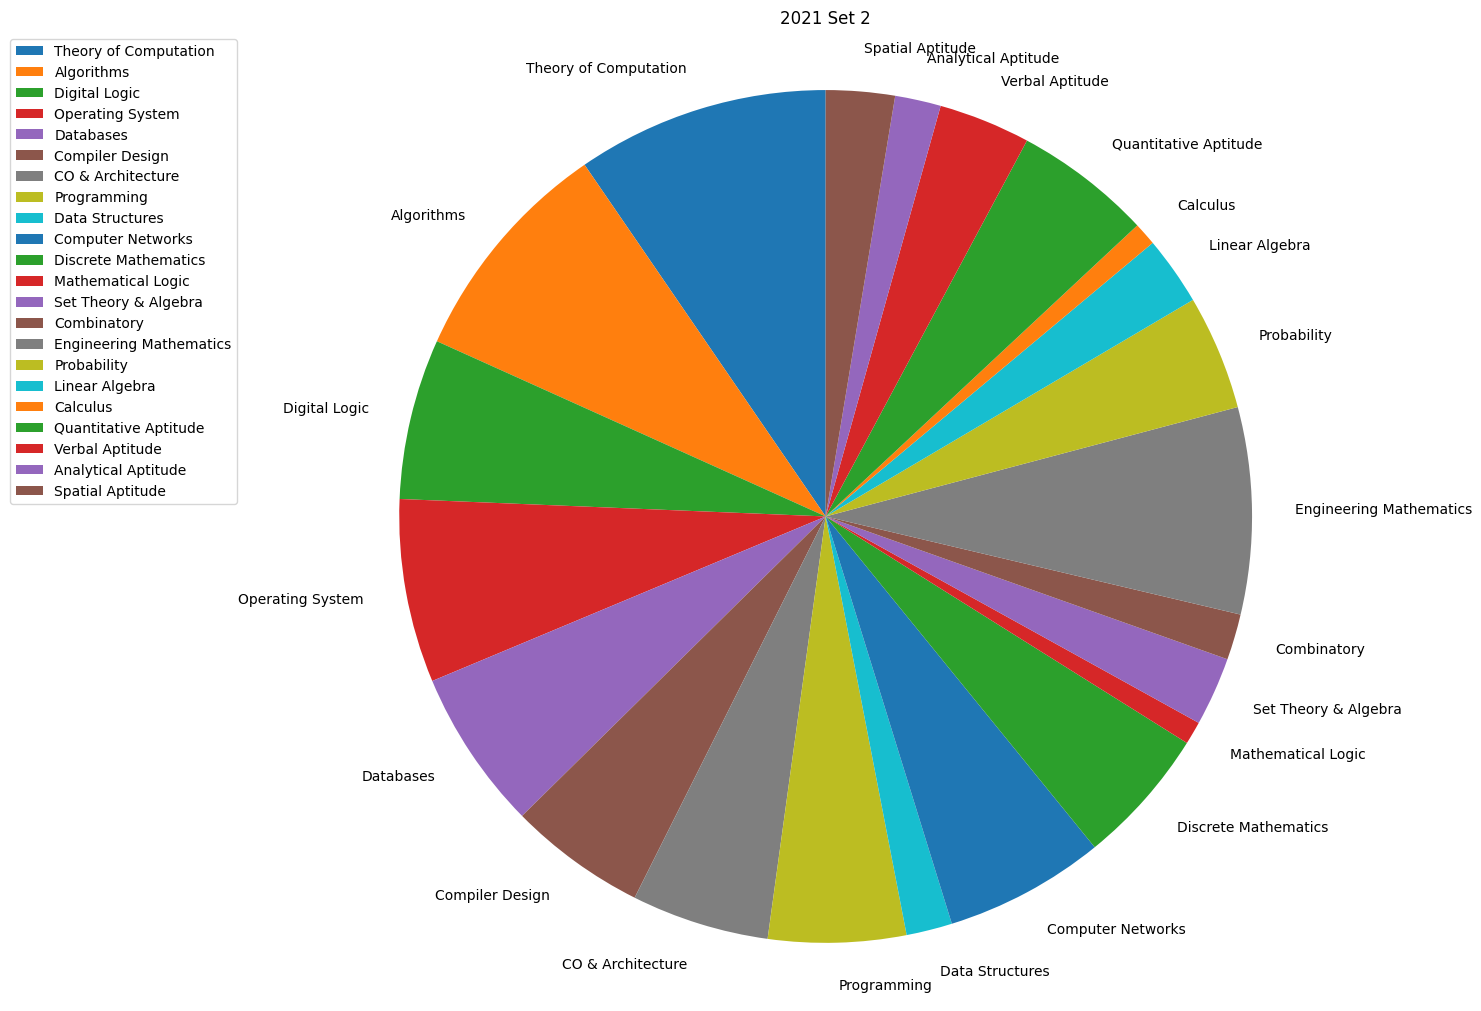

In [188]:
df.plot.pie(y=1,figsize=(15, 15),startangle=90, radius=1.1,label='')
plt.title('2021 Set 2')
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
#plt.axis('equal')
plt.tight_layout()
plt.savefig('piecharts\\piechart_2021_set2.png', bbox_inches='tight')

## Single Set

In [189]:
x=np.array(single_set.Year)
df1=single_set
df1.reset_index(drop=True, inplace=True)
df1.drop('Year',axis=1,inplace=True)
df1.drop('Total',axis=1,inplace=True)
df=pd.DataFrame(df1.T.values,columns=df1.index,index=df1.columns)
df = df.astype(int)

In [190]:
df

,0,1
Theory of Computation,9,8
Algorithms,6,6
Digital Logic,6,5
Operating System,9,10
Databases,5,7
...,...,...
Calculus,2,1
Quantitative Aptitude,5,6
Verbal Aptitude,4,3
Analytical Aptitude,3,3


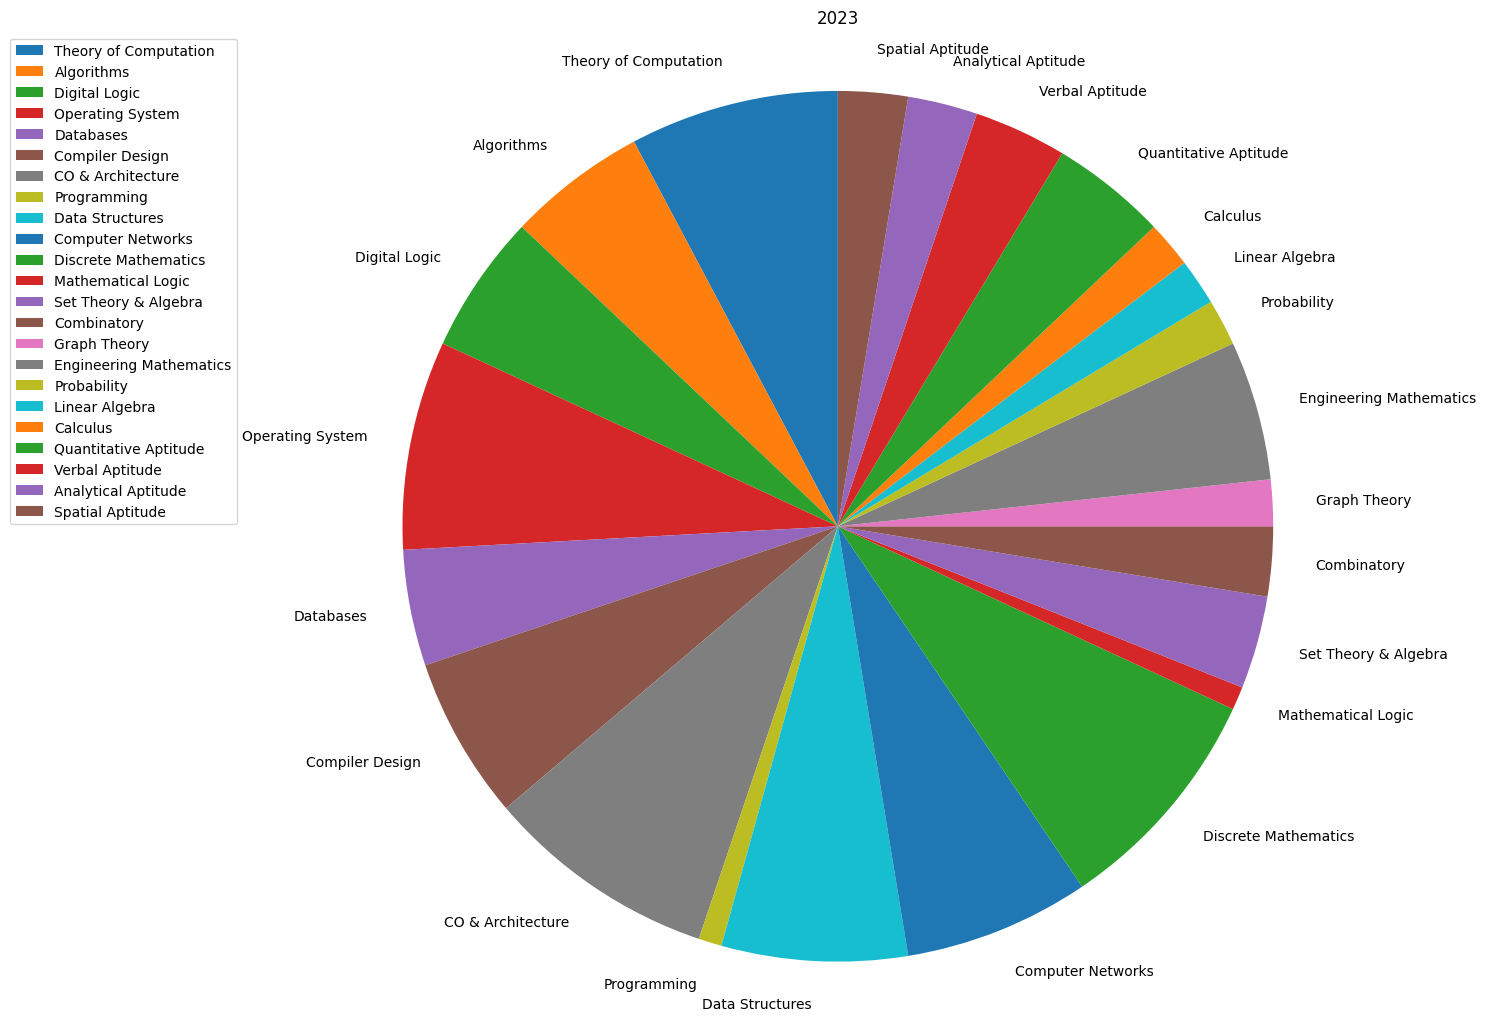

In [191]:
df.plot.pie(y=0,figsize=(15, 15),startangle=90, radius=1.1,label='')
plt.title('2023')
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
#plt.axis('equal')
plt.tight_layout()
plt.savefig('piecharts\\piechart_2023.png', bbox_inches='tight')

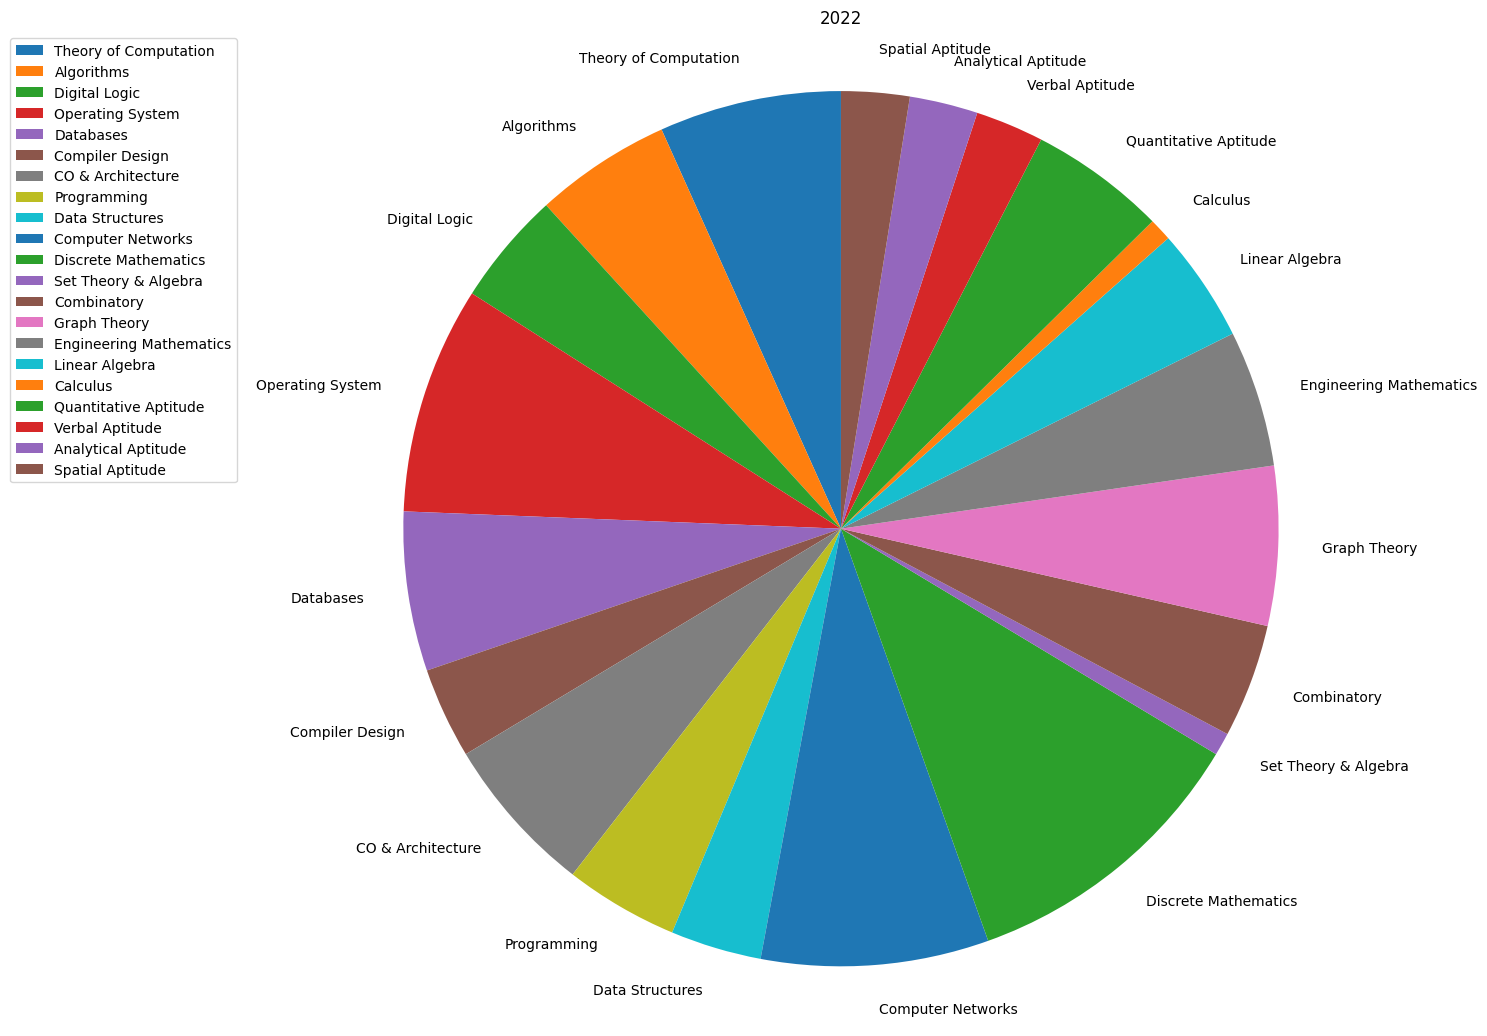

In [192]:
df.plot.pie(y=1,figsize=(15, 15),startangle=90, radius=1.1,label='')
plt.title('2022')
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
#plt.axis('equal')
plt.tight_layout()
plt.savefig('piecharts\\piechart_2022.png', bbox_inches='tight')